In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [2]:
titanic_df = pd.read_csv("https://github.com/datasciencedojo/datasets/raw/master/titanic.csv")

### Inpecting dataset

In [3]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [123]:
# basic statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [124]:
# missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
# age can be filled with average
# emabark town and deck left empty

In [213]:
# irrelevant variables - Name, Cabin, Embarked (city of coming on ship)

In [125]:
# variable types
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [126]:
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [132]:
# some columns are categorical but marked as object
print(pd.Categorical(titanic_df['Sex']))
print(pd.Categorical(titanic_df['Survived']))
print(pd.Categorical(titanic_df['Embarked']))

['male', 'female', 'female', 'female', 'male', ..., 'male', 'female', 'female', 'male', 'male']
Length: 891
Categories (2, object): ['female', 'male']
[0, 1, 1, 1, 0, ..., 0, 1, 0, 1, 0]
Length: 891
Categories (2, int64): [0, 1]
['S', 'C', 'S', 'S', 'S', ..., 'S', 'S', 'S', 'C', 'Q']
Length: 891
Categories (3, object): ['C', 'Q', 'S']


Text(0.5, 1.0, 'Age and Fare for Titanic pasengers')

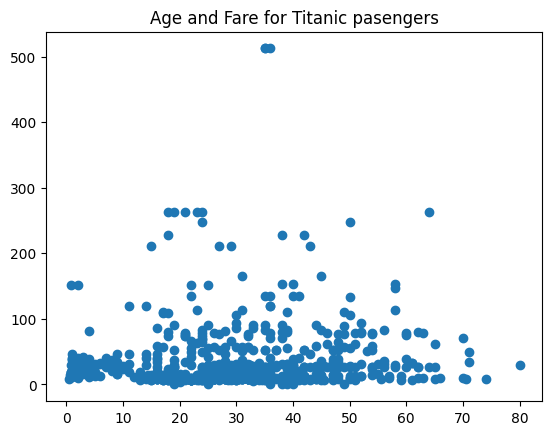

In [133]:
# basic visualization
plt.scatter(titanic_df["Age"], titanic_df["Fare"])
plt.title("Age and Fare for Titanic pasengers")

Text(0, 0.5, 'Count')

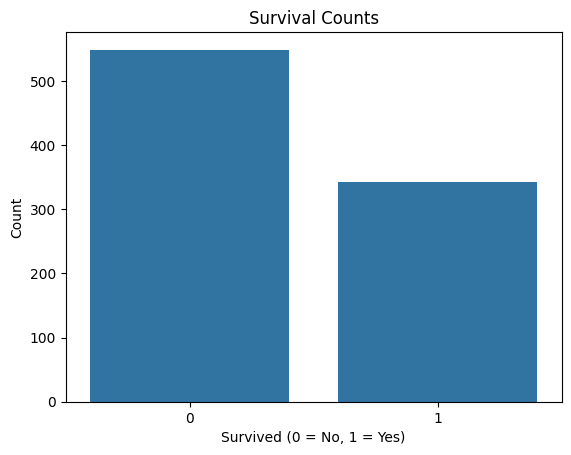

In [130]:
# number of survived passengers
sns.countplot(data=titanic_df, x='Survived')
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

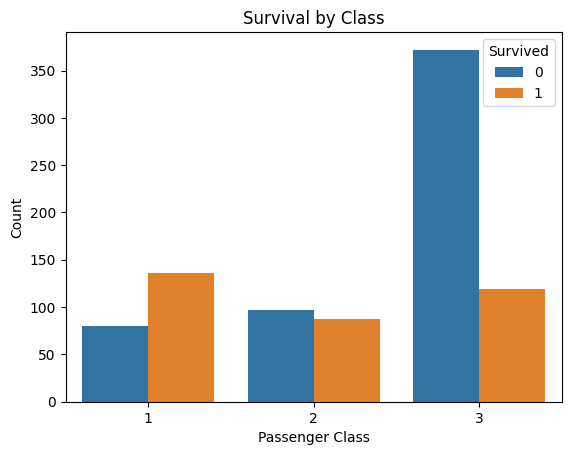

In [134]:
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.title('Survival by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

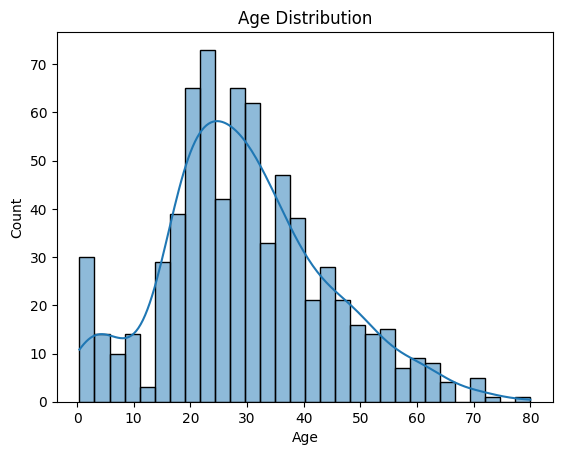

In [136]:
sns.histplot(titanic_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

In [139]:
# most popular age
titanic_df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

### More advanced statistics

In [100]:
# separated by class and sex

In [223]:
titanic_df.groupby(by=["Pclass", "Sex"]).describe()

PassengerId                                               \
                    count        mean         std   min     25%    50%   
Pclass Sex                                                               
1      female        94.0  469.212766  247.476723   2.0  293.50  447.0   
       male         122.0  455.729508  247.026449   7.0  255.50  480.5   
2      female        76.0  443.105263  243.627288  10.0  269.75  439.5   
       male         108.0  447.962963  256.922546  18.0  225.75  416.5   
3      female       144.0  399.729167  267.232416   3.0  165.25  376.0   
       male         347.0  455.515850  261.921251   1.0  209.50  466.0   

                             Survived            ... Parch        Fare  \
                  75%    max    count      mean  ...   75%  max  count   
Pclass Sex                                       ...                     
1      female  698.25  888.0     94.0  0.968085  ...   1.0  2.0   94.0   
       male    660.75  890.0    122.0  0.368852  ...   0.0  4.0  122.0   
2      female  616.75  881.0     76.0  0.921053  ...   1.0  3.0   76.0   
       male    677.50  887.0    108.0  0.157407  ...   0.0  2.0  108.0   
3      female  636.00  889.0    144.0  0.500000  ...   1.0  6.0  144.0   
       male    687.50  891.0    347.0  0.135447  ...   0.0  5.0  347.0   

                                                                               \
                     mean        std      min       25%       50%         75%   
Pclass Sex                                                                      
1      female  106.125798  74.259988  25.9292  57.24480  82.66455  134.500000   
       male     67.226127  77.548021   0.0000  27.72810  41.26250   78.459375   
2      female   21.970121  10.891796  10.5000  13.00000  22.00000   26.062500   
       male     19.741782  14.922235   0.0000  12.33125  13.00000   26.000000   
3      female   16.118810  11.690314   6.7500   7.85420  12.47500   20.221875   
       male     12.661633  11.681696   0.0000   7.75000   7.92500   10.008300   

                         
                    max  
Pclass Sex               
1      female  512.3292  
       male    512.3292  
2      female   65.0000  
       male     73.5000  
3      female   69.5500  
       male     69.5500  

[6 rows x 48 columns]

In [143]:
# by age
titanic_df.groupby(by="Age").describe()

PassengerId                                                          \
            count   mean         std    min     25%    50%     75%    max   
Age                                                                         
0.42          1.0  804.0         NaN  804.0  804.00  804.0  804.00  804.0   
0.67          1.0  756.0         NaN  756.0  756.00  756.0  756.00  756.0   
0.75          2.0  557.5  123.743687  470.0  513.75  557.5  601.25  645.0   
0.83          2.0  455.5  532.451406   79.0  267.25  455.5  643.75  832.0   
0.92          1.0  306.0         NaN  306.0  306.00  306.0  306.00  306.0   
...           ...    ...         ...    ...     ...    ...     ...    ...   
70.00         2.0  709.5   51.618795  673.0  691.25  709.5  727.75  746.0   
70.50         1.0  117.0         NaN  117.0  117.00  117.0  117.00  117.0   
71.00         2.0  295.5  280.721392   97.0  196.25  295.5  394.75  494.0   
74.00         1.0  852.0         NaN  852.0  852.00  852.0  852.00  852.0   
80.00         1.0  631.0         NaN  631.0  631.00  631.0  631.00  631.0   

      Survived       ... Parch       Fare                                 \
         count mean  ...   75%  max count      mean        std       min   
Age                  ...                                                   
0.42       1.0  1.0  ...  1.00  1.0   1.0    8.5167        NaN    8.5167   
0.67       1.0  1.0  ...  1.00  1.0   1.0   14.5000        NaN   14.5000   
0.75       2.0  1.0  ...  1.00  1.0   2.0   19.2583   0.000000   19.2583   
0.83       2.0  1.0  ...  1.75  2.0   2.0   23.8750   7.247845   18.7500   
0.92       1.0  1.0  ...  2.00  2.0   1.0  151.5500        NaN  151.5500   
...        ...  ...  ...   ...  ...   ...       ...        ...       ...   
70.00      2.0  0.0  ...  0.75  1.0   2.0   40.7500  42.779960   10.5000   
70.50      1.0  0.0  ...  0.00  0.0   1.0    7.7500        NaN    7.7500   
71.00      2.0  0.0  ...  0.00  0.0   2.0   42.0792  10.500536   34.6542   
74.00      1.0  0.0  ...  0.00  0.0   1.0    7.7750        NaN    7.7750   
80.00      1.0  1.0  ...  0.00  0.0   1.0   30.0000        NaN   30.0000   

                                               
            25%       50%       75%       max  
Age                                            
0.42     8.5167    8.5167    8.5167    8.5167  
0.67    14.5000   14.5000   14.5000   14.5000  
0.75    19.2583   19.2583   19.2583   19.2583  
0.83    21.3125   23.8750   26.4375   29.0000  
0.92   151.5500  151.5500  151.5500  151.5500  
...         ...       ...       ...       ...  
70.00   25.6250   40.7500   55.8750   71.0000  
70.50    7.7500    7.7500    7.7500    7.7500  
71.00   38.3667   42.0792   45.7917   49.5042  
74.00    7.7750    7.7750    7.7750    7.7750  
80.00   30.0000   30.0000   30.0000   30.0000  

[88 rows x 48 columns]

In [225]:
titanic_df.groupby(by="Age").agg({'Fare': "mean", 'Survived': "sum"})

,Fare,Survived
Age,,
0.42,8.5167,1
0.67,14.5000,1
0.75,19.2583,2
0.83,23.8750,2
0.92,151.5500,1
...,...,...
70.00,40.7500,0
70.50,7.7500,0
71.00,42.0792,0


In [108]:
# cumulative survival rate by ticket price

In [196]:
sorted_by_fare_df = titanic_df.sort_values(by="Fare")

In [197]:
cum_percentages = sorted_by_fare_df.Survived.cumsum() / len(sorted_by_fare_df)

Text(0.5, 1.0, 'Cumulative survival rate by ticket price')

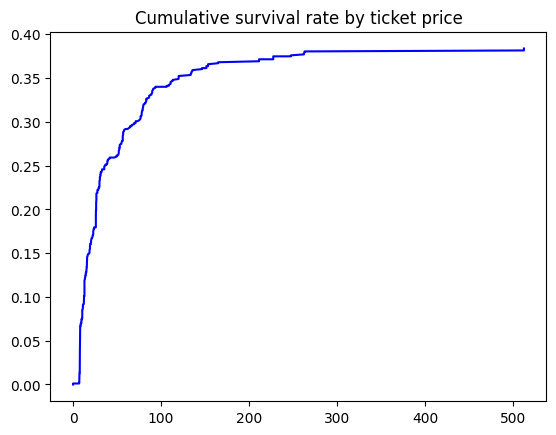

In [199]:
plt.plot(sorted_by_fare_df.Fare, cum_percentages,  linestyle='-', color='blue', label='Survival percentage')
plt.title("Cumulative survival rate by ticket price")

In [203]:
# cumulative survival rate as a function of passenger age
sorted_by_age_df = titanic_df.sort_values(by="Age")
cum_percentages = sorted_by_age_df.Survived.cumsum() / len(sorted_by_age_df)

Text(0.5, 1.0, 'Cumulative survival rate by age')

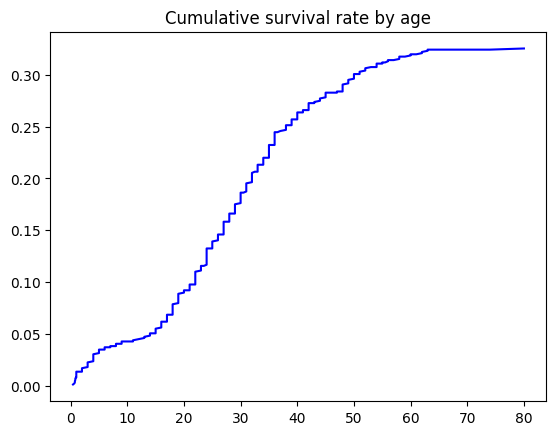

In [205]:
plt.plot(sorted_by_age_df.Age, cum_percentages,  linestyle='-', color='blue', label='Survival percentage')
plt.title("Cumulative survival rate by age")

In [209]:
titanic_df['Age'].corr(titanic_df['Fare'])

np.float64(0.0960666917690389)

In [214]:
# the cumulative survival rate as a function of ticket price *and* passenger age - 3D plot

In [215]:
sorted_df = titanic_df.sort_values(by=["Fare", "Age"])

In [218]:
cum_percentages = sorted_df.Survived.cumsum() / len(sorted_df)

In [226]:
import plotly.graph_objs as go

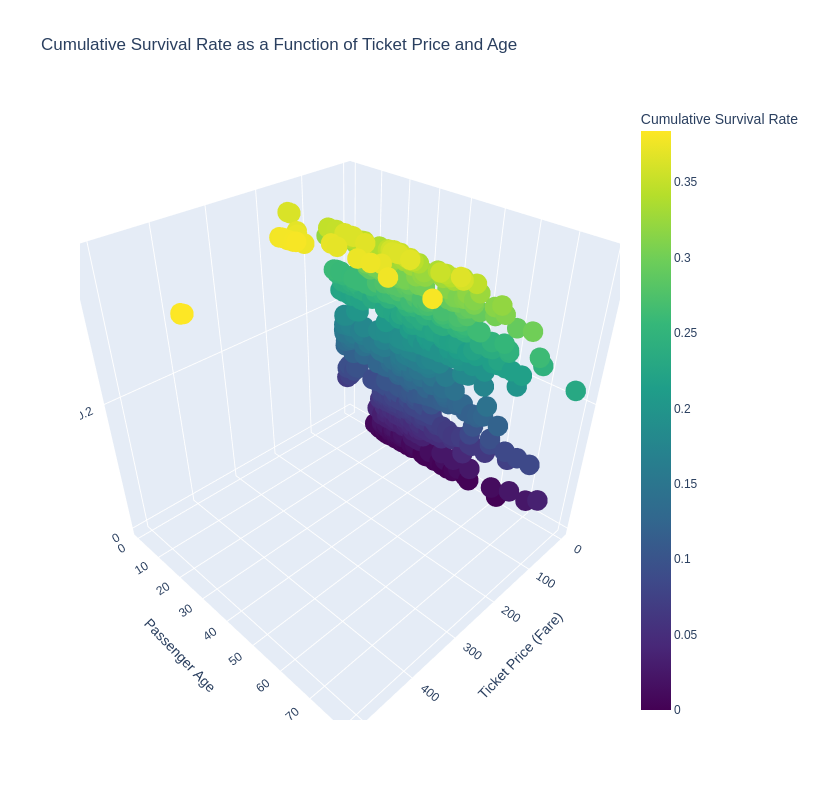

In [230]:
# Plotly 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=sorted_df['Fare'], 
    y=sorted_df['Age'], 
    z=cum_percentages,
    mode='markers',
    marker=dict(
        size=12,
        color=cum_percentages,  # Set color based on cumulative survival rate
        colorscale='Viridis',  # Choose color scale
        colorbar=dict(title="Cumulative Survival Rate")  # Add color bar
    )
)])

# Set labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Ticket Price (Fare)',
        yaxis_title='Passenger Age',
        zaxis_title='Cumulative Survival Rate'
    ),
    title='Cumulative Survival Rate as a Function of Ticket Price and Age',
    # Increase the size of the figure
    width=1000,  # Width of the plot
    height=800  # Height of the plot
)

# Show plot
fig.show()

In [161]:
# tickets numbers of all first class teenagers
titanic_df.loc[(titanic_df["Pclass"] == 1) & (titanic_df.Age < 20) & (titanic_df.Age > 10)][["Name", "Ticket"]]

,Name,Ticket
27,"Fortune, Mr. Charles Alexander",19950
136,"Newsom, Miss. Helen Monypeny",11752
291,"Bishop, Mrs. Dickinson H (Helen Walton)",11967
307,"Penasco y Castellana, Mrs. Victor de Satode (M...",PC 17758
311,"Ryerson, Miss. Emily Borie",PC 17608
329,"Hippach, Miss. Jean Gertrude",111361
435,"Carter, Miss. Lucile Polk",113760
504,"Maioni, Miss. Roberta",110152
505,"Penasco y Castellana, Mr. Victor de Satode",PC 17758
550,"Thayer, Mr. John Borland Jr",17421


### Airplane Orders & Deliveries dataset

In [10]:
airplanes_df = pd.read_csv("/home/alehak/Downloads/archive/OrdersandDeliveries.csv")

In [11]:
airplanes_df

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
0,Afghanistan,Ariana Afghan Airlines,1968,PW,727,Mar,1968,Central Asia,1,1,NaN
1,Afghanistan,Ariana Afghan Airlines,1970,PW,727,Apr,1969,Central Asia,1,1,NaN
2,Afghanistan,Ariana Afghan Airlines,1979,GE,DC-10,Sep,1978,Central Asia,1,1,NaN
3,Afghanistan,Ariana Afghan Airlines,NaN,CF,737-700,Nov,2005,Central Asia,0,4,NaN
4,Algeria,Air Algerie,1974,PW,727,Jan,1974,Africa,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9068,Zimbabwe,Air Zimbabwe,1987,PW,737-200,Jan,1987,Africa,2,2,NaN
9069,Zimbabwe,Air Zimbabwe,1990,PW,767-200ER,Mar,1989,Africa,1,1,NaN
9070,Zimbabwe,Air Zimbabwe,1989,PW,767-200ER,Jul,1988,Africa,1,1,NaN
9071,Zimbabwe,Air Zimbabwe,1986,PW,737-200,Dec,1986,Africa,1,1,NaN


In [12]:
# How many planes were in the building process for each month of the period covered by the dataset?

In [13]:
airplanes_df.loc[(airplanes_df['Customer Name'] == 'Ariana Afghan Airlines') & (airplanes_df['Model Series'] == '737-700')]

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
3,Afghanistan,Ariana Afghan Airlines,NaN,CF,737-700,Nov,2005,Central Asia,0,4,NaN


In [15]:
# suppose all delivery months were in december

In [16]:
airplanes_df["Delivery Month"] = "Dec"

In [17]:
airplanes_df

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Delivery Month
0,Afghanistan,Ariana Afghan Airlines,1968,PW,727,Mar,1968,Central Asia,1,1,NaN,Dec
1,Afghanistan,Ariana Afghan Airlines,1970,PW,727,Apr,1969,Central Asia,1,1,NaN,Dec
2,Afghanistan,Ariana Afghan Airlines,1979,GE,DC-10,Sep,1978,Central Asia,1,1,NaN,Dec
3,Afghanistan,Ariana Afghan Airlines,NaN,CF,737-700,Nov,2005,Central Asia,0,4,NaN,Dec
4,Algeria,Air Algerie,1974,PW,727,Jan,1974,Africa,1,1,NaN,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...
9068,Zimbabwe,Air Zimbabwe,1987,PW,737-200,Jan,1987,Africa,2,2,NaN,Dec
9069,Zimbabwe,Air Zimbabwe,1990,PW,767-200ER,Mar,1989,Africa,1,1,NaN,Dec
9070,Zimbabwe,Air Zimbabwe,1989,PW,767-200ER,Jul,1988,Africa,1,1,NaN,Dec
9071,Zimbabwe,Air Zimbabwe,1986,PW,737-200,Dec,1986,Africa,1,1,NaN,Dec


In [35]:
# drop all
airplanes_df.drop(9072, axis=0, inplace=True)

In [36]:
# convert dates to datetime

In [37]:
airplanes_df["order_date"] = airplanes_df["Order Year"] + " " + airplanes_df["Order Month"]

In [38]:
airplanes_df["order_datetime"] = pd.to_datetime(airplanes_df["order_date"], format='%Y %b')

In [26]:
airplanes_df["delivery_date"] = airplanes_df['Delivery Year '] + " " + airplanes_df["Delivery Month"]

In [39]:
airplanes_df["delivery_datetime"] = pd.to_datetime(airplanes_df["delivery_date"], format='%Y %b')

In [53]:
# drop NaT datetime rows
airplanes_df = airplanes_df.dropna(subset=['order_date', 'delivery_date'])

In [63]:
# convert planes number to int
airplanes_df["Delivery Total"] = airplanes_df["Delivery Total"].map(int)

In [64]:
# create date range for every row
airplanes_df["building_date_range"] = airplanes_df.apply(lambda row: pd.date_range(start=row["order_datetime"], end=row["delivery_datetime"], freq="MS"), axis=1)

In [65]:
airplanes_df_exploded = airplanes_df.explode("building_date_range")

In [71]:
month_building_planes = airplanes_df_exploded.groupby('building_date_range')['Delivery Total'].sum().reset_index()

In [72]:
month_building_planes.columns = ['month', 'planes_in_building']

In [73]:
month_building_planes

,month,planes_in_building
0,1955-10-01,61
1,1955-11-01,100
2,1955-12-01,143
3,1956-01-01,149
4,1956-02-01,158
...,...,...
802,2022-08-01,130
803,2022-09-01,130
804,2022-10-01,130
805,2022-11-01,130
